##### Grading Feedback Cell
Final Grade: 98%

**Question 0 (-2 pts if not provided):**  Enter your name and SU ID in the cell below.

Your name and SU ID Here:

- Chaithra Kopparam Cheluvaiah
- 326926205

# IST 718: Big Data Analytics

- Professors: 
  - Willard Williamson <wewillia@syr.edu>
  - Emory Creel <emcreel@syr.edu>
- Faculty Assistant: Shubham Sharma <shsharma@syr.edu>

## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers from your classmates.  Short code snippets are allowed from the internet.  Code from the class text books or class provided code can be copied in its entirety.__
- Google Colab is the official class runtime environment so you should test your code on Colab before submission.
- Do not modify cells marked as grading cells or marked as do not modify.
- Before submitting your work, remember to check for run time errors with the following procedure:
`Runtime `$\rightarrow$ Factory reset runtime followed by Runtime $\rightarrow$ Run All.  All runtime errors will result in a minimum penalty of half off.
- All plots shall include descriptive title and axis labels.  Plot legends shall be included where possible.  Unless stated otherwise, plots can be made using any Python plotting package.  It is understood that spark data structures must be converted to something like numpy or pandas prior to making plots.  All required mathematical operations, filtering, selection, etc., required by a homework question shall be performed in spark prior to converting to numpy or pandas.
- Grading feedback cells are there for graders to provide feedback to students.  Don't change or remove grading feedback cells.
- Don't add or remove files from your git repo.
- Do not change file names in your repo.  This also means don't change the title of the ipython notebook.
- You are free to add additional code cells around the cells marked `your code here`.
- We reserve the right to take points off for operations that are extremely inefficient or "heavy weight".  This is a big data class and extremely inefficient operations make a big difference when scaling up to large data sets.  For example, the spark dataframe collect() method is a very heavy weight operation and should not be used unless it there is a real need for it.  An example where collect() might be needed is to get ready to make a plot after filtering a spark dataframe.
- import * is not allowed because it is considered a very bad coding practice and in some cases can result in a significant delay (which slows down the grading process) in loading imports.  For example, the statement `from sympy import *` is not allowed.  You must import the specific packages that you need. 
- The graders reserve the right to deduct points for subjective things we see with your code.  For example, if we ask you to create a pandas data frame to display values from an investigation and you hard code the values, we will take points off for that.  This is only one of many different things we could find in reviewing your code.  In general, write your code like you are submitting it for a code peer review in industry.  
- Level of effort is part of our subjective grading.  For example, in cases where we ask for a more open ended investigation, some students put in significant effort and some students do the minimum possible to meet requirements.  In these cases, we may take points off for students who did not put in much effort as compared to students who put in a lot of effort.  We feel that the students who did a better job deserve a better grade.  We reserve the right to invoke level of effort grading at any time.
- Only use spark, spark machine learning, spark data frames, RDD's, and map reduce to solve all problems unless instructed otherwise.
- Your notebook must run from start to finish without requiring manual input by the graders.  For example, do not mount your personal Google drive in your notebook as this will require graders to perform manual steps.  In short, your notebook should run from start to finish with no runtime errors and no need for graders to perform any manual steps.

In [ ]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns

#### Read the data files
The cell below reads the assignment data files from github

In [ ]:
%%bash
# define an array of data file names
data_file_array=("indicator_gapminder_population.csv" "indicator_gapminder_under5mortality.csv" "indicator_life_expectancy_at_birth.csv" "indicator_undata_total_fertility.csv")

# for each data file
for file in ${data_file_array[@]}; do
  # if the data file does not exist on the local computer
  if [[ ! -f ./${file} ]]; then 
    # download the data file from github and save it on the local computer
    wget https://raw.githubusercontent.com/wewilli1/ist718_data/master/un_indicator_data/${file} &> /dev/null
  fi  
done

# Question 1 (10 pts)
In the game of [roullete](https://en.wikipedia.org/wiki/Roulette) you can bet on several things including if the ball will land on black or red. In a black or red bet, if you win, you double your earnings. How does the casino make money? If you look at the possibilities you realize that the chance of red or black are both slightly less than 1/2. There are two green spots, so the chance of landing on black (or red) is actually 18/38, or 9/19.<br>
Create a utility function which can be used in a monte carlo simulation named get_outcome. The get_outcome function takes as an argument the number of times you play (or spin) the roulette wheel and returns the player's earnings for the number of spins specified.  Assume that the player bets exactly one dollar on black for each spin of the wheel.

In [ ]:
# your code here
def get_outcome(n_spins:int) -> int:
  """
  Black and red spots are between 1-36. 
  2 green spots are 0 and 00. Number 37 represents double-zero
  """

  min_val = 0
  max_val = 37
  black_spots = np.array([2, 4, 6, 8, 10, 11, 13, 15, 17, 20, 22, 24, 26, 28, 29, 31, 33, 35])
  #red_spots = np.array([1,3,5,7,9,12,14,16,18,19,21,23,25,27,30,32,34,36])
  #green_spots = np.array([0,37])
  
  # uniformly distributed discrete values
  roulette_nums = np.array(np.random.randint(low=min_val, high=max_val+1, size=n_spins))
  total_earnings = [1 if num in black_spots else -1 for num in roulette_nums]
  outcome = sum(total_earnings)

  return outcome

In [ ]:
# Grading cell - do not change or delete
num_plays = 1000
num_samples = 100

num_plays_sum = 0
for i in range(num_samples):
  num_plays_sum += get_outcome(num_plays)/num_plays
print(num_plays_sum/num_samples)

-0.04751999999999998


##### Grading Feedback Cell

# Question 2 (10 pts)
Using the get_outcome function defined above, use a monte carlo simulation to study the distribution of total earnings.  Run 4 simulations for number of roulette plays = 10, 25, 100, and 1000 where each of the 4 simulations is executed 500 times.  Collect the results into a 2 dimensional numpy array named roulette_sim_array.  Make histogram plots for each of the 4 simulations.  Based on the histogram plots, describe what happens to toal earnings as the number of plays increases.

In [ ]:
# your code here
roulette_plays = np.array([10, 25, 100, 1000])
n = 500

# initilaizing empty matrix
roulette_sim_array = np.zeros((len(roulette_plays),n))

# number of simulations
for row,num_plays in enumerate(roulette_plays):
  # executing each simulation 500 times
  for col in range(n):
    roulette_sim_array[row][col] = get_outcome(num_plays)

print(roulette_sim_array)

[[   2.    4.   -2. ...   -2.    2.   -6.]
 [   7.   -1.   -1. ...   -7.   -5.   -5.]
 [  -2.   10.  -12. ...    0.  -22.    8.]
 [ -22.    0.  -28. ... -106.  -72.  -82.]]


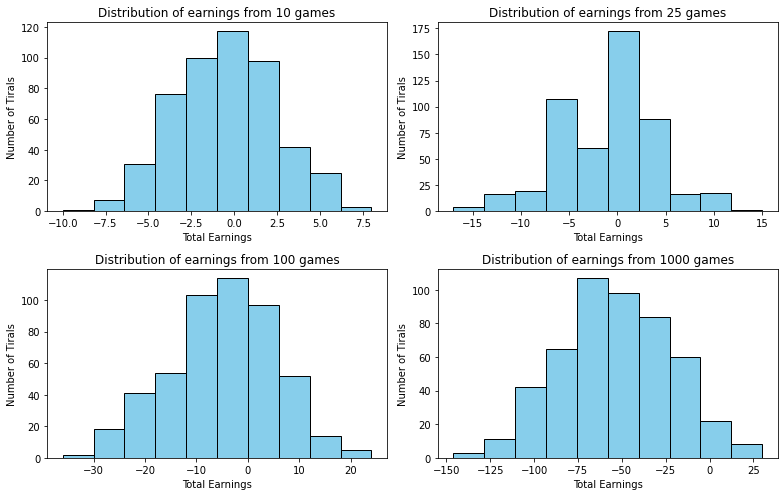

In [ ]:
# creating histogram plots of 4 simulations
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11,7)) 

#Simulation of 10 plays
axes[0,0].hist(roulette_sim_array[0], ec='black', color='skyblue')
axes[0,0].title.set_text('Distribution of earnings from 10 games')
axes[0,0].set_xlabel('Total Earnings')
axes[0,0].set_ylabel('Number of Tirals')

#Simulation of 25 plays
axes[0,1].hist(roulette_sim_array[1], ec='black', color='skyblue')
axes[0,1].title.set_text('Distribution of earnings from 25 games')
axes[0,1].set_xlabel('Total Earnings')
axes[0,1].set_ylabel('Number of Tirals')

#Simulation of 100 plays
axes[1,0].hist(roulette_sim_array[2], ec='black', color='skyblue')
axes[1,0].title.set_text('Distribution of earnings from 100 games')
axes[1,0].set_xlabel('Total Earnings')
axes[1,0].set_ylabel('Number of Tirals')

#Simulation of 1000 plays
axes[1,1].hist(roulette_sim_array[3], ec='black', color='skyblue')
axes[1,1].title.set_text('Distribution of earnings from 1000 games')
axes[1,1].set_xlabel('Total Earnings')
axes[1,1].set_ylabel('Number of Tirals')

plt.tight_layout()

##### Grading Feedback Cell

Your explanation here:<br>  

The histogram reveals that the range of total earnings expanded as the number of games increased.

- Overall earnings for 10 roulette games range from -10 to 7.5.
- For 25 roulette games, it ranges from -15 to 15
- For 100 roulette games, it ranges from -30 to 30
- For 1000 roulette games, it ranges from -150 to 25

The overall loss is between -10 and -150, whereas the overall gain is between 7.5 and 25. With more games being played, players are losing a lot of money while making relatively little. In particular, we can see that the greater region of the histogram is on the side of negative earnings in the roulette games 100 and 1000.

##### Grading Feedback Cell

# Question 3 (10 pts)
Using the central limit theorem, create a pandas dataframe named roulette_df containing the sampling distribution of the means from the sample data in the numpy array above.  The pandas dataframe shall have 4 columns labeled with the simulation names. Using data in the roulette_df, plot histograms for each of the sampling distributions - you should have 4 histograms in total.<br>  

The following question is based on the theory of central limit theorem sampling.  Assuming you don't know the underlying distribution of the population from which the samples were drawn, some of the histograms are gauranteed to be Gaussian in shape, some are not gauranteed, and some are in a transition region. For each of the 4 simulations, describe if you think the shape is gauranteed to be gaussian, not gauranteed to be Gaussian, or in a transition area between a gaurantee and no gaurantee.

In [ ]:
# converting 500 iterations to 500 average
avg_array = roulette_sim_array/roulette_plays[:, None]
print(avg_array)

roulette_df = pd.DataFrame(avg_array.transpose(), columns={'Sim_10','Sim_25','Sim_100','Sim_1000'})


[[ 0.2    0.4   -0.2   ... -0.2    0.2   -0.6  ]
 [ 0.28  -0.04  -0.04  ... -0.28  -0.2   -0.2  ]
 [-0.02   0.1   -0.12  ...  0.    -0.22   0.08 ]
 [-0.022  0.    -0.028 ... -0.106 -0.072 -0.082]]


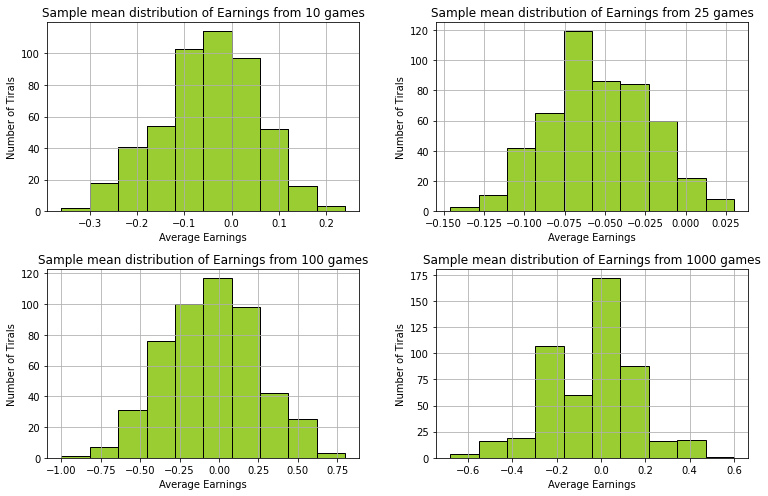

In [70]:
# creating histogram plots of 4 simulations
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11,7)) 

#Sample mean distribution of 10 plays
ax1 = plt.subplot(axes[0, 0])
roulette_df['Sim_10'].hist(ec='black', color='yellowgreen')
ax1.title.set_text('Sample mean distribution of Earnings from 10 games')
ax1.set_xlabel('Average Earnings')
ax1.set_ylabel('Number of Tirals')

#Sample mean distribution of 10 plays
ax1 = plt.subplot(axes[0, 0])
roulette_df['Sim_10'].hist(ec='black', color='yellowgreen')
ax1.title.set_text('Sample mean distribution of Earnings from 10 games')
ax1.set_xlabel('Average Earnings')
ax1.set_ylabel('Number of Tirals')

#Sample mean distribution of 25 plays
ax2 = plt.subplot(axes[0, 1])
roulette_df['Sim_25'].hist(ec='black', color='yellowgreen')
ax2.title.set_text('Sample mean distribution of Earnings from 25 games')
ax2.set_xlabel('Average Earnings')
ax2.set_ylabel('Number of Tirals')

#Sample mean distribution of 100 plays
ax3= plt.subplot(axes[1, 0])
roulette_df['Sim_100'].hist(ec='black', color='yellowgreen')
ax3.title.set_text('Sample mean distribution of Earnings from 100 games')
ax3.set_xlabel('Average Earnings')
ax3.set_ylabel('Number of Tirals')

#Sample mean distribution of 1000 plays
ax4 = plt.subplot(axes[1, 1])
roulette_df['Sim_1000'].hist(ec='black', color='yellowgreen')
ax4.title.set_text('Sample mean distribution of Earnings from 1000 games')
ax4.set_xlabel('Average Earnings')
ax4.set_ylabel('Number of Tirals')

plt.tight_layout()

In [ ]:
# Grading cell - do not modify
display(roulette_df.head())

,Sim_100,Sim_1000,Sim_10,Sim_25
0,0.2,0.28,-0.02,-0.022
1,0.4,-0.04,0.10,0.000
2,-0.2,-0.04,-0.12,-0.028
3,0.2,-0.28,-0.10,-0.028
4,0.2,-0.20,-0.08,-0.030


##### Grading Feedback Cell

Your explanation here:<br>

According to central limit theorem, sampling distribution of the sample means will be roughly normally distributed if we take sufficiently enough random samples from a population.

- 10 roulette's first histogram shape can be compared to a bell curve. A large portion of the data is centered between the mean -0.050. Plot also looks symmetric around the mean value. This plot, in my opinion, is guaranteed to be guassian.

- 25 roulette's second histogram shape can be compared to a bell curve. A large portion of the data is centered between the mean values 0.00. Plot also looks symmetric around the mean values. This plot, in my opinion, is guaranteed to be guassian.

- 100 roulette's third histogram shape can be compared to a bell curve. A large portion of the data is centered between the mean values -0.075 and -0.05. Plot also looks symmetric around the mean values. This plot, in my opinion, is guaranteed to be guassian.

- 1000 roulette's fourth histogram shape can be compared to a bell curve. A large portion of the data is centered between the mean values -0.1. Plot also looks symmetric around the mean. But the data is quiet spread out. Standard deviation of this plot seems to be higher than other plots. This plot, in my opinion, is guaranteed to be guassian.


##### Grading Feedback Cell
- -2 The analysis was supposed to be on the CLT theory and the lecture slides have the correct answer.

# Question 4 (20 pts)
Create a new monte carlo simulation that calculates the probability that the casino loses money based on the number of times that a player plays roulette.  Create a function p_casino_loss that takes as an argument the number of times that the player plays roulette (n_plays), and returns the probability that the casino loses money.  Your code should simulate spinning the roulette wheel.  Run the n_plays simulation a fixed large number of times (100 works) and return the average probability result.  Using data collected from p_casino_loss, produce a line plot that shows the probability that the casino loses money vs. the number of games played for number of games between 25 and 1000.  Describe what the results of the simulation show.

In [ ]:
# your code here
def p_casino_loss(n_plays:int) -> float:
  """
  Black and red spots are between 1-36. 
  2 green spots are 0 and 00. Number 37 represents double-zero
  """
  min_val = 0
  max_val = 37
  black_spots = np.array([2, 4, 6, 8, 10, 11, 13, 15, 17, 20, 22, 24, 26, 28, 29, 31, 33, 35])
  #red_spots = np.array([1,3,5,7,9,12,14,16,18,19,21,23,25,27,30,32,34,36])
  #green_spots = np.array([0,37])
  
  total_loss = 0
  n = 100
  for _ in range(n):
    # uniformly distributed discrete values
    roulette_nums = np.array(np.random.randint(low=min_val, high=max_val+1, size=n_plays))
    casino_loss = sum([1 if num in black_spots else 0 for num in roulette_nums])
    casino_wins = n_plays - casino_loss
    if casino_loss > casino_wins:
      total_loss = total_loss + 1

  avg_prob = total_loss/n

  return avg_prob

In [ ]:
avg_prob = [p_casino_loss(play) for play in range(25,1000)]

Text(0, 0.5, 'Probability of Casino Loss')

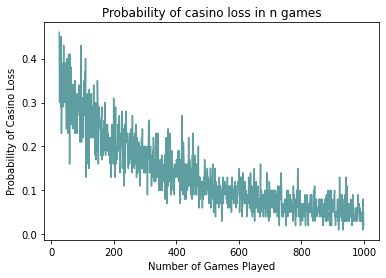

In [ ]:
plt.plot(list(range(25,1000)), avg_prob, color='cadetblue')
plt.title('Probability of casino loss in n games')
plt.xlabel('Number of Games Played')
plt.ylabel('Probability of Casino Loss')

Your explanation here:<br>

The roulette game is rigged. The chance that the casino will lose money reduces as the player plays more games. There is a lot of noise in the plot, which shows that you can sometimes win and sometimes lose. When we consider the overall trend, gamers will ultimately lose money.

##### Grading Feedback Cell

# Question 5 (10 pts)
Compute the following matrix dot product manually by creating 2 dimensinal nympy arrays for each matrix, computing the matrix multiply using python for loops, and loading a new 2 dimensional numpy array with the answer.  Print the resulting numpy array.

$$
\quad
\begin{bmatrix} 
3 & 7 \\
6 & 9 \\
4 & 2 \\
\end{bmatrix}
\quad
*
\quad
\begin{bmatrix} 
2 & 5 & 7\\
2 & 5 & 1
\end{bmatrix}
\quad
$$

In [ ]:
matrix1 = np.array([[3,7],[6,9],[4,2]])
matrix2 = np.array([[2,5,7],[2,5,1]])

# dot product shape
print('dot product matrix shape:{}X{}'.format(matrix1.shape[0],matrix2.shape[1]))

#intilaizing empty matrix for dot product
dot_prod = np.zeros((matrix1.shape[0],matrix2.shape[1]))

# iterating through rows of matrix 1
for row_mat1 in range(matrix1.shape[0]):
  # iterating through columns of matrix 2 
  for col_mat2 in range(matrix2.shape[1]): 
    # iterating through columns of matrix1 and rows of matrix2. num_cols in matrix1 == num_rows in matrix2
    for col1_row2 in range(matrix2.shape[0]): 
      dot_prod[row_mat1][col_mat2] += matrix1[row_mat1][col1_row2] * matrix2[col1_row2][col_mat2]

print(dot_prod)

dot product matrix shape:3X3
[[20. 50. 28.]
 [30. 75. 51.]
 [12. 30. 30.]]


In [ ]:
#validating results using numpy built-in function
assert np.alltrue(np.dot(matrix1, matrix2) == dot_prod)

##### Grading Feedback Cell

# Question 6 (10 pts)
Read each of the 4 assignment csv files into pandas dataframes named population_df, morttality_df, life_exp_df, and fertility_df.  Rename the column with the country names as "Country" in each of the dataframes.  Hint - the bash datafiles data_file_array at the start of the assignment has the file names you need to load.  Another thing you can do is click the colab file icon to the left to view the file names stored on the local colab instance.

In [ ]:
# reading csv files
population_df = pd.read_csv('indicator_gapminder_population.csv')
morttality_df = pd.read_csv('indicator_gapminder_under5mortality.csv')
life_exp_df = pd.read_csv('indicator_life_expectancy_at_birth.csv')
fertility_df = pd.read_csv('indicator_undata_total_fertility.csv')

In [ ]:
# renaming the columns
population_df.rename(columns={'Total population':'Country'}, inplace=True)
morttality_df.rename(columns={'Under five mortality':'Country'}, inplace=True)
life_exp_df.rename(columns={'Life expectancy with projections. Yellow is IHME':'Country'}, inplace=True)
fertility_df.rename(columns={'Total fertility rate':'Country'}, inplace=True)

In [ ]:
# grading cell - do not modify
display(population_df.head())
display(morttality_df.head())
display(life_exp_df.head())
display(fertility_df.head())

,Country,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3280000,3280000,3323519,3448982,3625022,3810047,3973968,4169690,4419695,...,25183615,25877544,26528741,27207291,27962207,28809167,29726803,30682500,31627506,32526562
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700,15700,15700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,"410,445",423591,438671,457234,478227,506889,552800,610036,672544,...,3050741,3010849,2968026,2929886,2901883,2886010,2880667,2883281,2889676,2896679
4,Algeria,"2,503,218",2595056,2713079,2880355,3082721,3299305,3536468,3811028,4143163,...,33749328,34261971,34811059,35401790,36036159,36717132,37439427,38186135,38934334,39666519


,Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,468.58,468.58,468.58,468.58,468.58,468.58,469.98,469.98,469.98,...,116.3,113.2,110.4,107.6,105.0,102.3,99.5,96.7,93.9,91.1
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,...,19.5,18.7,17.9,17.3,16.6,16.0,15.5,14.9,14.4,14.0
4,Algeria,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,...,32.1,30.7,29.5,28.4,27.4,26.6,25.8,25.2,24.6,24.0


,Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.2110,28.200753,28.190507,28.18026,28.170013,28.159767,28.14952,28.139273,28.129027,...,53.2,53.6,54.0,54.5,54.8,55.2,55.5,56.2,56.91,57.63
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.4000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,...,74.5,74.7,74.9,75.0,75.2,75.5,75.7,75.8,75.90,76.00
4,Algeria,28.8224,28.822400,28.822400,28.82240,28.822400,28.822400,28.82240,28.822400,28.822400,...,74.8,75.0,75.3,75.6,75.9,76.1,76.2,76.3,76.40,76.50


,Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
4,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71


##### Grading Feedback Cell

# Question 7 (10 pts)
The data frames from the question above are organized such that rows are countries and columns are years.  Reorganize each data frame such that each row contains 3 columns: country, year, and a data value.  This is known as the long or tidy format.  For example, the population data frame columns start out as country, year, year, year, ..., year.  After reorganizing, the population data frame columns will contain only 3 columns: country, year, and population.  Save the reorganized data into new data frames named tidy_population_df, tidy_morttality_df, tidy_life_exp_df, and tidy_fertility_df.  You are free to use any means necessary to perform this task but the pandas melt function may be useful.

In [ ]:
# your code here

# unpivoting the dataframes
tidy_population_df = pd.melt(population_df, id_vars=['Country'], 
                             value_vars=list(population_df.columns).remove('Country'), 
                             var_name='Year', value_name='Population')

tidy_morttality_df = pd.melt(morttality_df, id_vars=['Country'], 
                             value_vars=list(morttality_df.columns).remove('Country'), 
                             var_name='Year', value_name='Population')

tidy_life_exp_df = pd.melt(life_exp_df, id_vars=['Country'], 
                             value_vars=list(life_exp_df.columns).remove('Country'), 
                             var_name='Year', value_name='Population')

tidy_fertility_df = pd.melt(fertility_df, id_vars=['Country'], 
                             value_vars=list(fertility_df.columns).remove('Country'), 
                             var_name='Year', value_name='Population')

In [ ]:
# grading cell - do not modify
display(tidy_population_df.head())
print(tidy_population_df.shape)
display(tidy_morttality_df.head())
print(tidy_morttality_df.shape)
display(tidy_life_exp_df.head())
print(tidy_life_exp_df.shape)
display(tidy_fertility_df.head())
print(tidy_fertility_df.shape)

,Country,Year,Population
0,Abkhazia,1800,NaN
1,Afghanistan,1800,3280000
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,"410,445"
4,Algeria,1800,"2,503,218"


(22275, 3)


,Country,Year,Population
0,Abkhazia,1800,NaN
1,Afghanistan,1800,468.58
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,375.20
4,Algeria,1800,460.21


(59400, 3)


,Country,Year,Population
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.2110
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.4000
4,Algeria,1800,28.8224


(56160, 3)


,Country,Year,Population
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99


(56160, 3)


##### Grading Feedback Cell

# Question 8 (10 pts)
Join all 4 dataframes together such that the country, year, population, mortality, life expectancy, and fertility columns are collected together in the same dataframe.  The join operation should not throw away any data.  Name the new dataframe concat_df.  Next, delete all rows where life expectancy and fertility are NAN.

In [ ]:
# your code here

# renaming the Population Column
tidy_morttality_df.rename(columns={'Population':'Mortality'}, inplace=True)
tidy_life_exp_df.rename(columns={'Population':'Life Expectancy'}, inplace=True)
tidy_fertility_df.rename(columns={'Population':'Fertility'}, inplace=True)

dfs = [tidy_population_df,
       tidy_morttality_df,
       tidy_life_exp_df,
       tidy_fertility_df]

# full outer join of all the dataframes with reduce
concat_df = reduce(lambda left_df, right_df: pd.merge(left_df, right_df, how='outer', on = ['Country','Year']),dfs)

# dropping the rows with Na Values in both Life Expectancy and Fertility
concat_df.dropna(subset=['Life Expectancy', 'Fertility'] ,how='all',inplace=True)

Text(33.0, 0.5, 'Row Index')

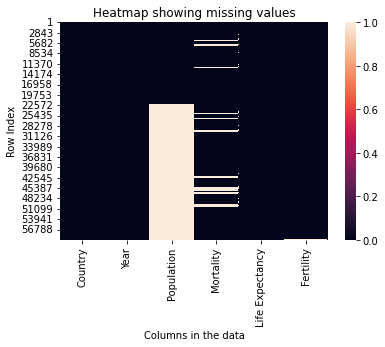

In [ ]:
# validating the results
sns.heatmap(concat_df.isna())
plt.title('Heatmap showing missing values')
plt.xlabel('Columns in the data')
plt.ylabel('Row Index')

In [ ]:
# grading cell - do not modify
display(concat_df.head())
print(concat_df.shape)

,Country,Year,Population,Mortality,Life Expectancy,Fertility
1,Afghanistan,1800,3280000,468.58,28.2110,7.00
3,Albania,1800,"410,445",375.20,35.4000,4.60
4,Algeria,1800,"2,503,218",460.21,28.8224,6.99
7,Angola,1800,1567028,485.68,26.9800,6.93
9,Antigua and Barbuda,1800,37000,473.60,33.5360,5.00


(43789, 6)


##### Grading Feedback Cell
Very nice heat map!

# Question 9 (10 pts)
Using concat_df, report the child mortality rate and life expectancy in 2015 for these 5 countries:
1. Sri Lanka
2. Poland
3. Malaysia
4. Pakistan
5. Thailand

In [ ]:
# Your code here
countries = ['Sri Lanka','Poland','Malaysia','Pakistan','Thailand']
concat_df[(concat_df['Country'].isin(countries)) & (concat_df['Year'] == '2015')][['Country','Year','Mortality','Life Expectancy']]

,Country,Year,Mortality,Life Expectancy
22215,Malaysia,2015,8.2,75.1
22251,Pakistan,2015,81.1,66.5
22259,Poland,2015,5.2,77.3
22293,Sri Lanka,2015,8.7,76.5
22304,Thailand,2015,12.3,75.1


##### Grading Feedback Cell